In [7]:
import re
import glob
import numpy as np

from os import path
from scipy import fftpack
from matplotlib import pyplot as plt
from multiprocessing import Pool

In [2]:
ref_file_paths = glob.glob('../data/noise-features2-dwt/ref_spn_*')

In [3]:
print(ref_file_paths)

['../data/noise-features2-dwt/ref_spn_iPhone-6.npy', '../data/noise-features2-dwt/ref_spn_Sony-NEX-7.npy', '../data/noise-features2-dwt/ref_spn_iPhone-4s.npy', '../data/noise-features2-dwt/ref_spn_Samsung-Galaxy-S4.npy', '../data/noise-features2-dwt/ref_spn_Samsung-Galaxy-Note3.npy', '../data/noise-features2-dwt/ref_spn_HTC-1-M7.npy', '../data/noise-features2-dwt/ref_spn_LG-Nexus-5x.npy', '../data/noise-features2-dwt/ref_spn_Motorola-Nexus-6.npy', '../data/noise-features2-dwt/ref_spn_Motorola-X.npy', '../data/noise-features2-dwt/ref_spn_Motorola-Droid-Maxx.npy']


In [4]:
p = re.compile('ref_spn_(.*?)\.npy', re.IGNORECASE)
class_names = []

for rfp in ref_file_paths:
    rfp = path.basename(rfp)
    m = p.match(rfp)
    class_names.append(m.group(1))

print(class_names)


['iPhone-6', 'Sony-NEX-7', 'iPhone-4s', 'Samsung-Galaxy-S4', 'Samsung-Galaxy-Note3', 'HTC-1-M7', 'LG-Nexus-5x', 'Motorola-Nexus-6', 'Motorola-X', 'Motorola-Droid-Maxx']


In [6]:
spns = {}

for class_name in class_names:
    spn = np.load('../data/noise-features2-dwt/ref_spn_%s.npy' % class_name)
    spns[class_name] = spn


In [16]:
def fft_magnitude(image):
    f = fftpack.fft2(image)
    f = fftpack.fftshift(f)
    f = np.abs(f)**2

    return np.log(f)


In [47]:
thread_pool = Pool(5)

In [ ]:
ffts = thread_pool.map(fft_magnitude, spns.values())

In [ ]:
for class_name, spn in spns.items():
    plt.hist(spn[:,:,:3].ravel())
    plt.title(class_name)
    plt.show()

In [51]:
def combined_fft(img):
    nr, nc = img.shape[:2]
    imgs = np.sum(img, axis=2)
    
    sf = np.stack([
        fftpack.fftshift(fftpack.fft2(imgs)),
        fftpack.fftshift(fftpack.fft2(img[:,:,0] - img[:,:,1])),
        fftpack.fftshift(fftpack.fft2(img[:,:,1] - img[:,:,2])),
        fftpack.fftshift(fftpack.fft2(img[:,:,2] - img[:,:,0])),
        fftpack.fftshift(fftpack.fft2(img[:,:,3]))], axis=-1)
    
    return np.abs(sf)

combfft = []

for spn in spns.values():
    combfft.append(combined_fft(spn))


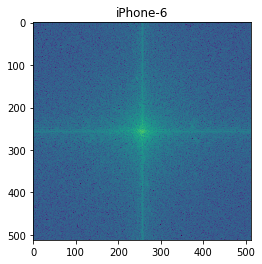

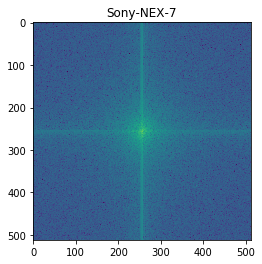

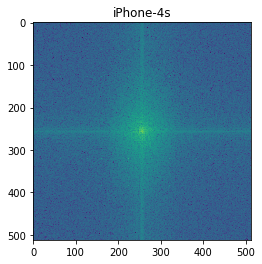

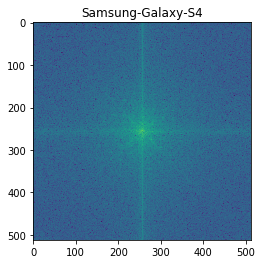

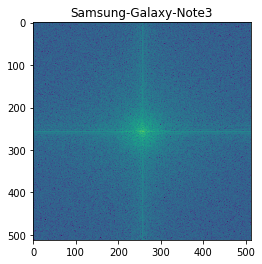

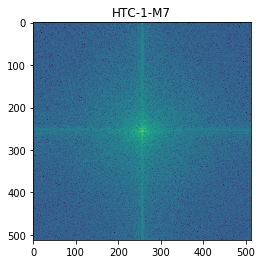

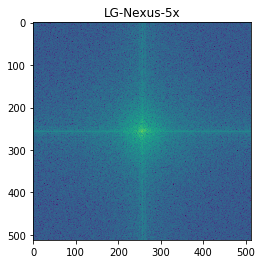

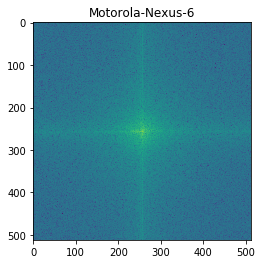

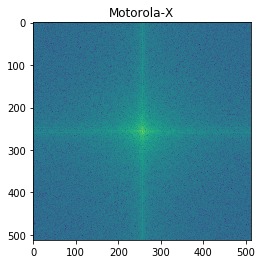

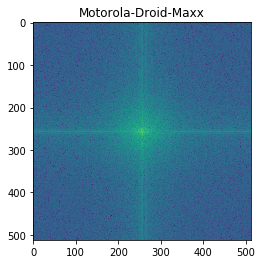

In [71]:
for class_name, spec in zip(class_names, combfft):
    plt.imshow(np.log(spec[:,:,3]))
    #plt.hist(mag_spec[:,:,:3].ravel())
    plt.title(class_name)
    plt.show()
    

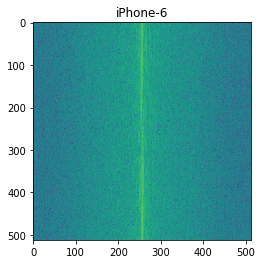

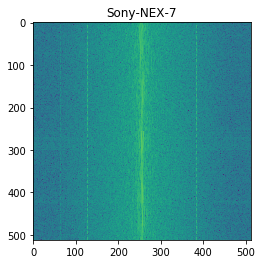

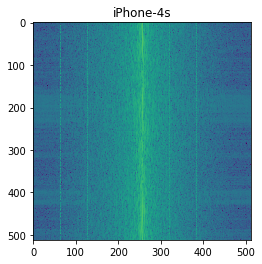

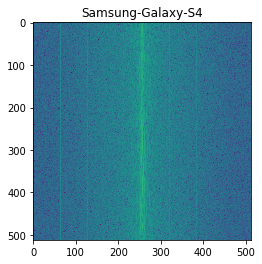

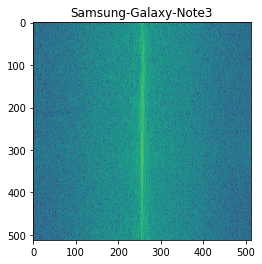

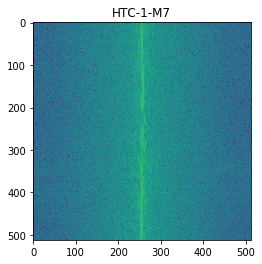

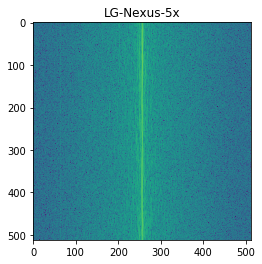

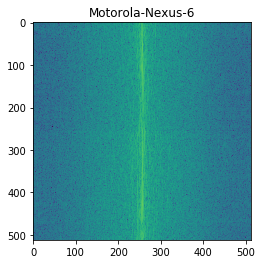

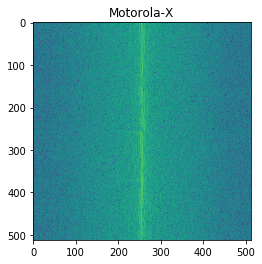

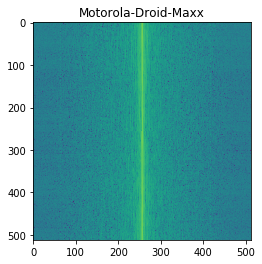

In [66]:
for class_name, mag_spec in zip(class_names, ffts):
    plt.imshow(mag_spec[:,:,1])
    #plt.hist(mag_spec[:,:,:3].ravel())
    plt.title(class_name)
    plt.show()
    